# 人工筛选web可视化版代码
首先，需要将您要整理的数据集放在目录 `web_show_css/models_copy/` 下，一个可能的文件树是：
```
web_show_css
├── static
    ├── css
    ├── js
    ├── models_copy  //your data set
    │   ├── deleted_models/
    │   ├── json/
    │   |   ├── antique.jsonl(未清洗数据的jsonl文件)
    │   |   ├── cleaned_json.jsonl(清洗后的jsonl文件)
    │   |   ├── deleted_json.jsonl(清洗后的json文件)
    │   ├── 1.glb
    │   ├── 2.glb
    │   ...
    ├── templates/
    |   ├──index.html (网页渲染页面)
|   app.py （主运行程序）
|   feedback.jsonl
```


在**独立**窗口命令行运行 `app.py` 后，你会得到类似下面的输出：
```shell
(glf) D:\脚痛大学\basics\大三上\机器学习>C:/anaconda/envs/glf/python.exe d:/脚痛大学/basics/大三上/机器学习/web_show_css/app.py
 * Serving Flask app 'app' (lazy loading)
 * Environment: production
   WARNING: This is a development server. Do not use it in a production deployment.
   Use a production WSGI server instead.
 * Debug mode: on
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 927-463-179
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
```
最后一行是您的网址，打开它即可判断模型！
页面勉强能看，长这样：
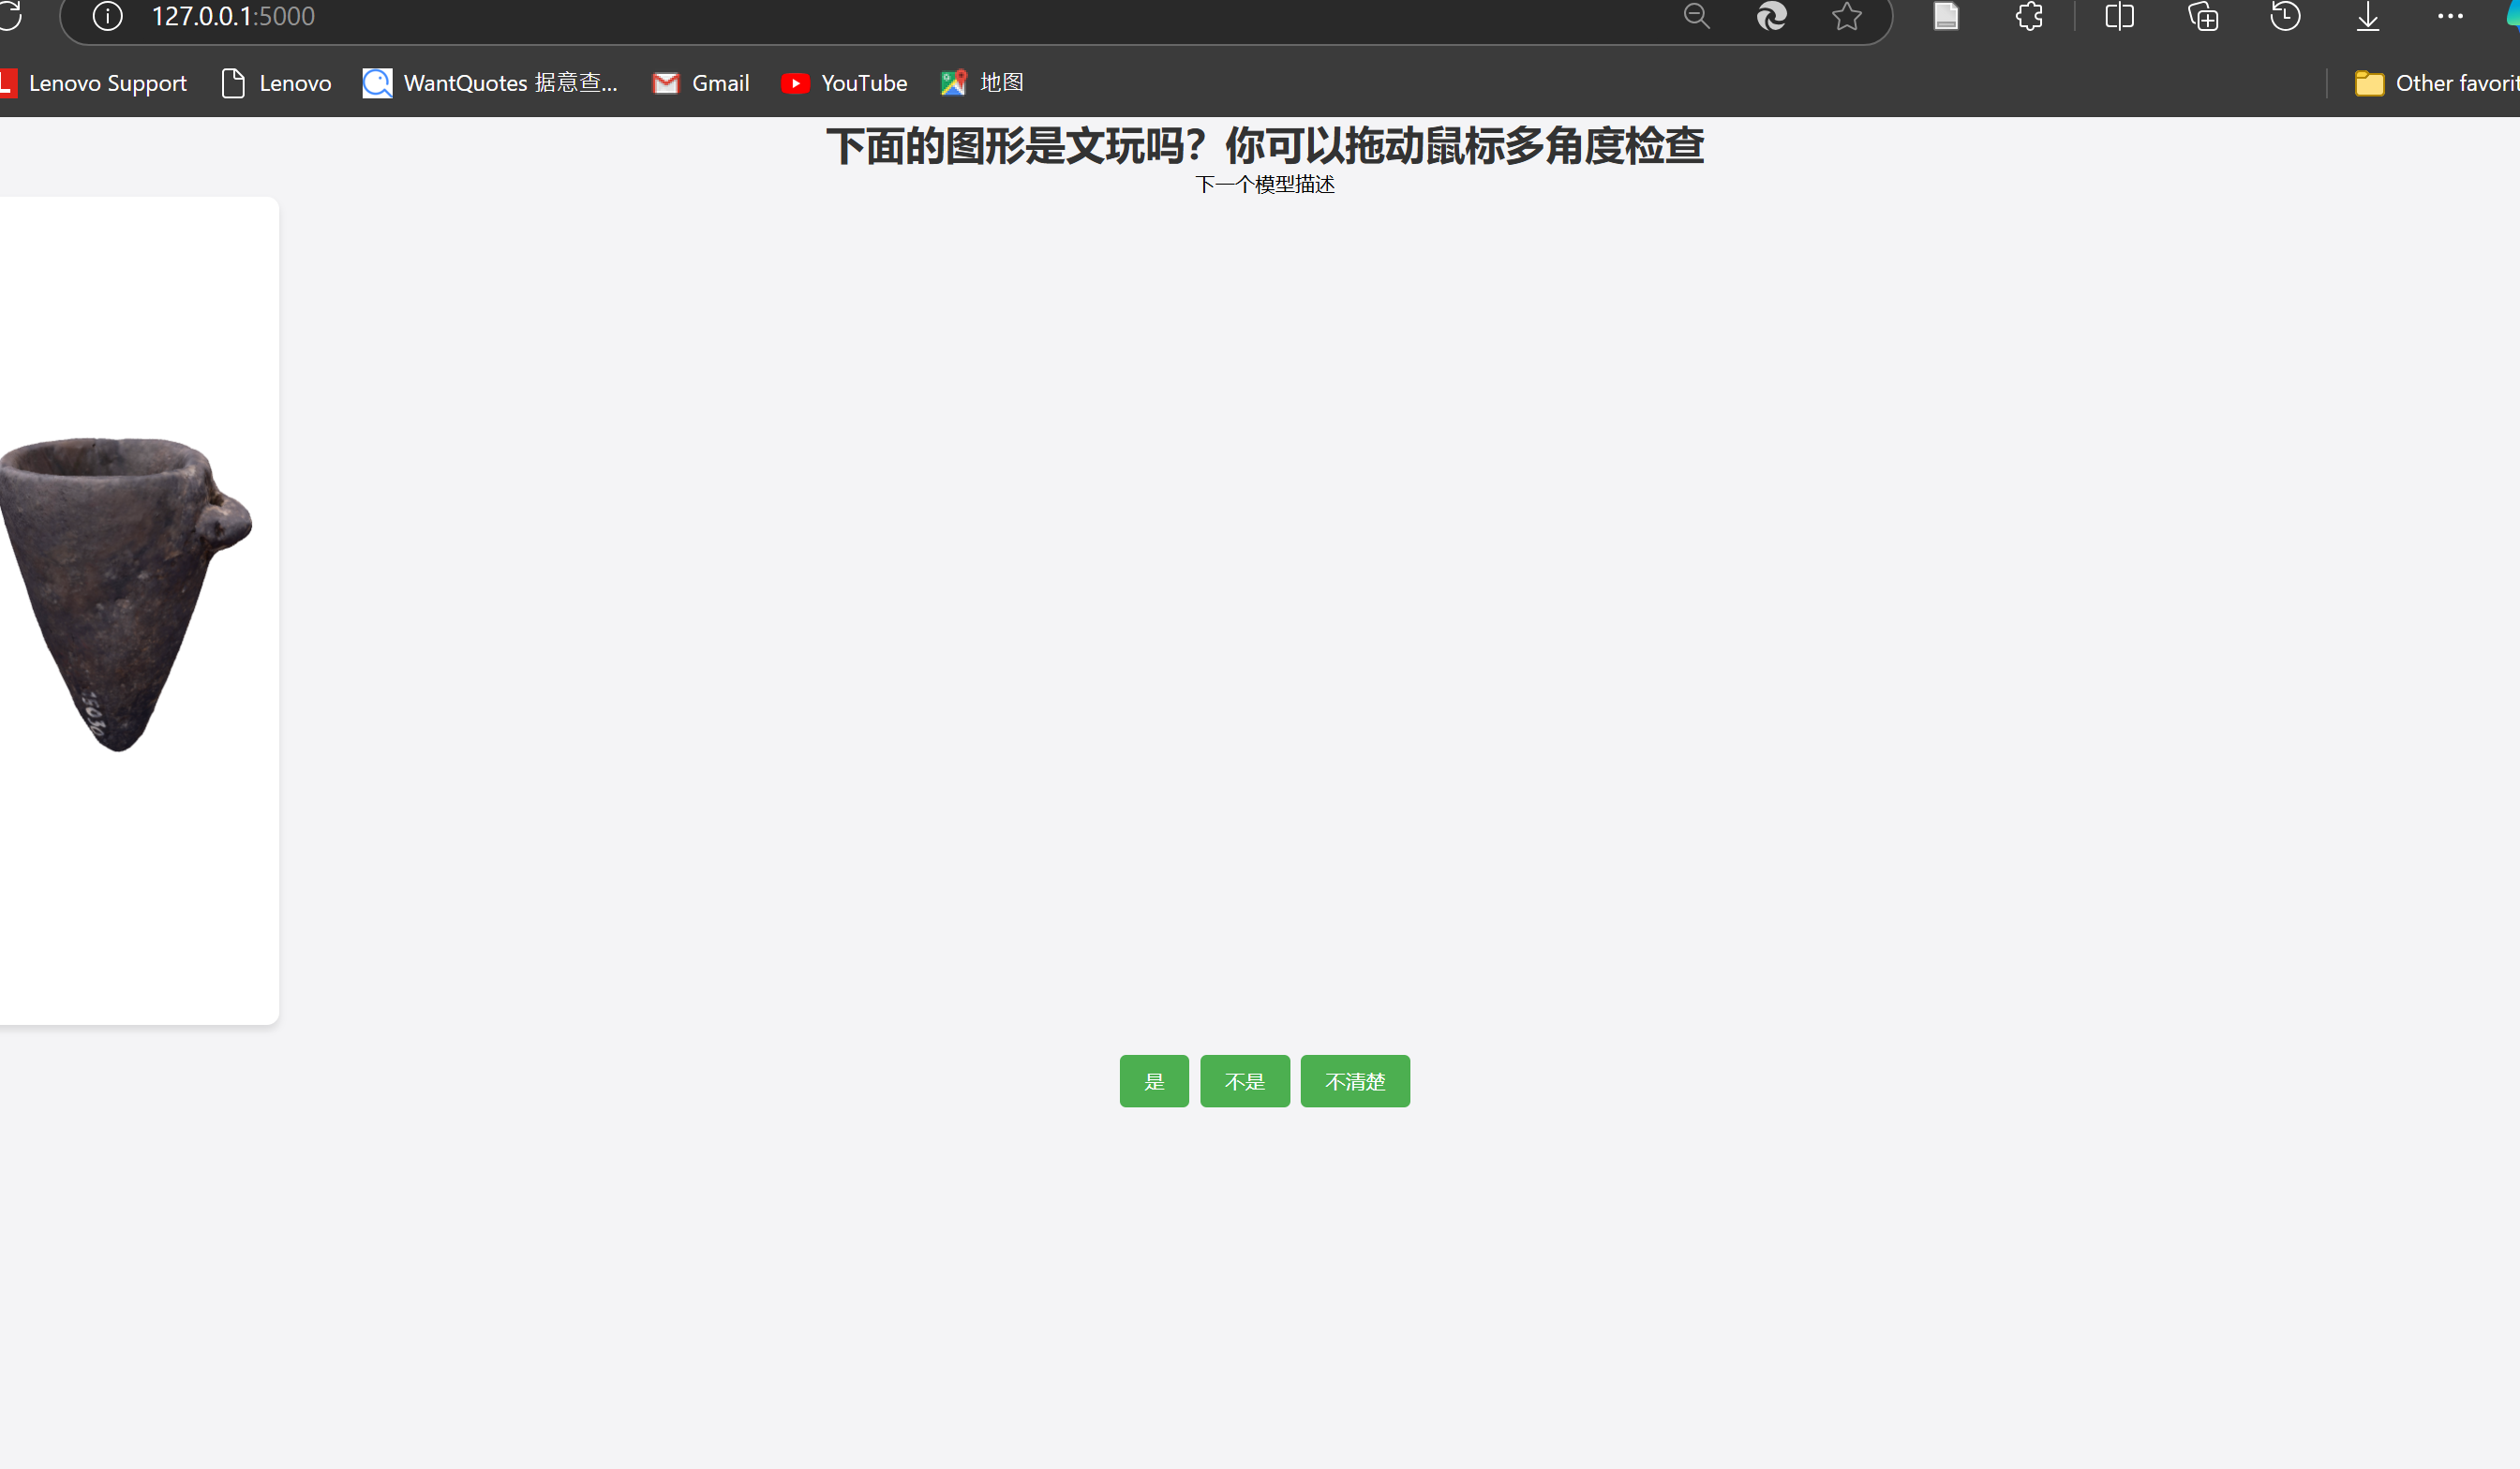
其没有进度提示功能和转到前一张后一张的功能！！！
其点击结果会保存在 `feedback.jsonl` 文件中（只有yes/no）。执行以下内容进行数据移动等后处理


In [14]:

total_file_name = 'D:\脚痛大学/basics\大三上\机器学习\web_show_css\static/1500_1799\jsons\existing_models.jsonl'
filter_result = '\脚痛大学/basics\大三上\机器学习\web_show_css\static/1500_1799\jsons/feedback.jsonl'
cleaned_json_path = "\脚痛大学/basics\大三上\机器学习\web_show_css\static/1500_1799\jsons/cleaned_json.json"  # 清洗后的json文件保存路径
deleted_models_path = "\脚痛大学/basics\大三上\机器学习\web_show_css\static/1500_1799\deleted_models"  # 被删除模型的保存路径
deleted_json_path = "\脚痛大学/basics\大三上\机器学习\web_show_css\static/1500_1799\jsons\deleted_json.json"  # 被删除模型信息的 JSON 文件路径

import os
if not os.path.exists(deleted_models_path):
    os.makedirs(deleted_models_path)

import json
import re

def read_jsonl_models(file_path):
    models = []
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
        # 使用正则表达式分割多个 JSON 对象
        json_objects = re.findall(r'\{.*?\}', content, re.DOTALL)
        for obj in json_objects:
            try:
                models.append(json.loads(obj))
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON: {e}\nObject: {obj}")
    return models


filter_file = read_jsonl_models(filter_result)
total = read_jsonl_models(total_file_name)


In [15]:
print(total)

[{'model name': 'Fragmentary figure of the goddess Isis-Serqet', 'description': 'Fragmentary green basalt figure of the goddess Isis-Serqet, the lower body and base now missing.', 'download_link': 'https://sketchfab.com/3d-models/fragmentary-figure-of-the-goddess-isis-serqet-9cd02b85b85d44bd906a3b79274b7654#download', 'uid': '29d23dd4-62ee-5925-a642-a69896bb4d3a'}, {'model name': 'Tablet', 'description': 'Clay tablet with four and five lines of inscription; Third Dynasty of Ur.\nMuseum number: 117304\n© The Trustees of the British Museum. Shared under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0) licence.\nSee: https://www.britishmuseum.org/collection/object/W_1925-0509-126', 'download_link': 'https://sketchfab.com/3d-models/tablet-462b5ca19a0e4c98b059c88258ea892e#download', 'uid': '0245e5ac-898b-53f8-91a0-58570d36589d'}, {'model name': 'Tablet', 'description': 'Clay tablet with four and four columns of inscription; Third Dynasty of Ur; two

In [16]:
import shutil
import os
# create filter append in dict:
filter_dict = {}
for i in filter_file:
    filter_dict[i["model"].split('.')[0]] = i["response"]
print(filter_dict)


{'00b4f7b4-b16a-50c1-881e-3804c6ea0eea': 'yes', '01aefe1d-106b-59b8-a477-42c281134d7e': 'yes', '022547d7-3a5d-594d-806e-7e18b8dd2353': 'no', '023d9373-2af3-5247-9f5b-02392740c3e3': 'yes', '030286f2-8782-59ac-88a9-5d5816f20ce7': 'no', '03d779d4-35d0-5728-9964-290c621e9c2b': 'yes', '047f1a94-5878-5c6e-88a0-adfa705ecfc3': 'yes', '05680ef4-cd4e-5f39-852b-60a25aba20e3': 'yes', '058bf41c-545d-5763-8628-0d50a8d75346': 'yes', '05ab451a-713e-541b-b839-51c1b16aeff2': 'yes', '06019e2c-a42e-5268-a198-ff90f9060d73': 'no', '06e933e8-be0f-51ce-9b1e-035608f0202e': 'no', '07af2ca0-2401-5fe4-ada1-410cf98f12c3': 'no', '0852c264-d155-5411-976b-76b791efec5e': 'yes', '0867cbe7-4193-5f5b-b0f7-e5aa69d30119': 'yes', '087f1922-4e0b-5300-8b42-b8f5f35d5cb3': 'yes', '09490e20-5673-596d-b86b-f9a96b08530e': 'yes', '09b865a4-ffaf-5839-b556-8db235c17a2d': 'yes', '09c0a717-d488-562f-8fad-3111c71215ac': 'yes', '09e84287-e090-553d-8326-75c7c07713d7': 'no', '0a335f71-e60e-591b-9963-b9f1daf3ae8e': 'no', '0b007db6-a15b-5b2d

In [25]:

cleaned_json = []
deleted_json = []
# create original dict:
for i in total:
    uid = i['uid']
    if uid in filter_dict:
        if (filter_dict[uid] == 'yes'):
            # append i to cleaned_json
            cleaned_json.append(i)
            print(i)
        if (filter_dict[uid] == 'no'):
            # append i to deleted_json
            deleted_json.append(i)
            # move uid.glb file to deleted_models_path
            print(i)
            if os.path.exists('D:\脚痛大学/basics\大三上\机器学习\web_show_css\static/1500_1799/' + uid + '.glb'):
                shutil.move('D:\脚痛大学/basics\大三上\机器学习\web_show_css\static/1500_1799/' + uid + '.glb',
                        deleted_models_path + '/' + uid + '.glb')

print(deleted_json)
with open(cleaned_json_path, 'w') as f:
    json.dump(cleaned_json, f, indent=4)
with open(deleted_json_path, 'w') as f:
    json.dump(deleted_json, f, indent=4)
    


{'model name': 'Votive figure', 'description': 'Woman’s head from a diorite votive statue; wearing broad head-band; carved and polished; damaged left eye and forehead.\nCultures/periods: Third Dynasty of Ur\nProduction date: 2150BC-2000BC\nExcavated/Findspot: Ur (city - archaic)', 'download_link': 'https://sketchfab.com/3d-models/votive-figure-9c5c63a177a84c7bb2d8986d517884d6#download', 'uid': '17f380af-18ba-5541-918e-f1be3875c929'}
{'model name': 'Fired clay model boat', 'description': 'Fired clay model boat; handmade.\nCultures/periods: Early Dynastic III\nProduction date: 2500BC\nExcavated/Findspot: Royal Cemetery (Ur)\nMuseum Number: 123731', 'download_link': 'https://sketchfab.com/3d-models/fired-clay-model-boat-ffe3abc922a845bea58a4ce3328b319f#download', 'uid': '133f6e64-b736-5c36-8ebe-46ce3ec3a5a4'}
{'model name': 'Clay tablet', 'description': 'Clay tablet with five and five lines of inscription; Third Dynasty of Ur.\nMuseum number: 96496\n© The Trustees of the British Museum. S

In [24]:
deleted_json

[{'model name': 'Gongzi Liao Fort',
  'description': 'The fort was built by the Japanese in 1904 after they landed in Keelung following the Treaty of Shimonoseki with Qing Dynasty. It had been used as a military facility and garrison was placed there after the handover of Taiwan from Japan to the Republic of China.',
  'download_link': 'https://sketchfab.com/3d-models/gongzi-liao-fort-8f58e13a69a84598a13fce8494b48b48#download',
  'uid': '06019e2c-a42e-5268-a198-ff90f9060d73'},
 {'model name': 'Humility Brings Prosperity gate - point cloud',
  'description': 'A big point cloud of the Humility Brings Prosperity gate, now installed in Gallery 200 at Mia.',
  'download_link': 'https://sketchfab.com/3d-models/humility-brings-prosperity-gate-point-cloud-68ba9abd86ea4491918e7b9e6949cb9e#download',
  'uid': '63069061-faf8-5d47-b0a0-e72626afca7a'},
 {'model name': 'Turtle ship (Geobukseon) | 거북선 | 龜船 | 沐海船',
  'description': 'So many textures… Sorry. Used in Woowakgood’s 9th situational drama c

In [18]:
categories = set()
for i in cleaned_json:
    categories.add(i['uid'])
print(len(categories))


237


In [22]:
len(total)

5231

In [26]:
print(f"deleted {len(deleted_json)} with {len(cleaned_json)} models left.")

deleted 61 with 237 models left.


In [7]:
import json
cleaned_json_path = "D:\脚痛大学/basics\大三上\机器学习\models_copy\json\cleaned_json.json"  # 清洗后的json文件保存路径
# load in json file:
with open(cleaned_json_path, 'r') as f:
    cleaned_json = json.load(f)
print(len(cleaned_json))
# get unique categories:
categories = set()
for i in cleaned_json:
    categories.add(i['uid'])
print(categories)

691
{'352fd629-88ac-5302-b0ef-c2dfe4f61a68', '586750df-3785-52f6-a705-6cadfad8a34c', 'ffba008e-35be-5257-aac7-f43cc40ce430', '9a6f3f36-1bb4-5d4e-b90e-f7edb91c4c94', '94c64fae-ba2e-5513-b9e6-60bc09875c93', '4d244ae2-77f3-54b5-b73c-292be1d4db9d', '313361c9-5733-5c17-9f79-8dffd61a761d', 'cb5d77ed-0415-5f04-9552-9ca51d1f1069', '8e86773d-b4aa-50f5-88e8-aee458a3316c', '7a770d07-71f6-5737-8816-aa9cbe92f257', '226462d4-841b-5fe8-9c71-05740aabbc1b', '7af50bc7-7bc5-59de-aa75-92aa806afb79', 'caf4f0f2-edfc-5684-be8e-138e27ff9402', '0c98e751-715b-5745-ab57-69c32f19e6c5', '0ea5e816-7de5-5c68-8de6-d6a3e084e21a', 'c4f83e53-eb27-5c2d-9f8f-d905acc88f0b', 'c93d7bc2-935a-5cbe-9c0c-99c3d8223d75', '7b79adbc-898f-5cc1-9e17-f1cfcb312701', '5f563779-9a55-5a20-a93d-80650a339321', 'c824be4b-8c0a-5489-9cf8-a38b7ee5dd28', '8900c828-0748-596f-aae4-486dcdec9244', 'ac0eb2b6-b2c8-5060-adb1-3caa52130432', '14af9c25-2f17-52dd-ba1d-018cf0f73ced', 'f4c786bd-06d6-5124-bb99-d4d3483357dc', '92e3e68d-d558-5d8a-a84e-c0938d9561

In [8]:
print(len(categories))

579
